In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import KMeansClustering as kmc
from sklearn.decomposition import PCA

In [3]:
group01_1_train=glob("group01_1/group01/Train/*.png")
group01_1_train

['group01_1/group01/Train/106.png',
 'group01_1/group01/Train/107.png',
 'group01_1/group01/Train/108.png',
 'group01_1/group01/Train/109.png',
 'group01_1/group01/Train/110.png',
 'group01_1/group01/Train/111.png',
 'group01_1/group01/Train/112.png',
 'group01_1/group01/Train/113.png',
 'group01_1/group01/Train/114.png',
 'group01_1/group01/Train/115.png',
 'group01_1/group01/Train/116.png',
 'group01_1/group01/Train/17.png',
 'group01_1/group01/Train/18.png',
 'group01_1/group01/Train/19.png',
 'group01_1/group01/Train/20.png',
 'group01_1/group01/Train/21.png',
 'group01_1/group01/Train/22.png',
 'group01_1/group01/Train/23.png',
 'group01_1/group01/Train/24.png',
 'group01_1/group01/Train/25.png',
 'group01_1/group01/Train/26.png',
 'group01_1/group01/Train/27.png',
 'group01_1/group01/Train/28.png',
 'group01_1/group01/Train/29.png',
 'group01_1/group01/Train/30.png',
 'group01_1/group01/Train/31.png',
 'group01_1/group01/Train/32.png',
 'group01_1/group01/Train/33.png',
 'group01

In [4]:

group01_1_test  =glob("group01_1/group01/Test/*.png")
group01_1_test  

['group01_1/group01/Test/52.png',
 'group01_1/group01/Test/57.png',
 'group01_1/group01/Test/92.png']

In [5]:
ls=group01_1_train+group01_1_test
ls

['group01_1/group01/Train/106.png',
 'group01_1/group01/Train/107.png',
 'group01_1/group01/Train/108.png',
 'group01_1/group01/Train/109.png',
 'group01_1/group01/Train/110.png',
 'group01_1/group01/Train/111.png',
 'group01_1/group01/Train/112.png',
 'group01_1/group01/Train/113.png',
 'group01_1/group01/Train/114.png',
 'group01_1/group01/Train/115.png',
 'group01_1/group01/Train/116.png',
 'group01_1/group01/Train/17.png',
 'group01_1/group01/Train/18.png',
 'group01_1/group01/Train/19.png',
 'group01_1/group01/Train/20.png',
 'group01_1/group01/Train/21.png',
 'group01_1/group01/Train/22.png',
 'group01_1/group01/Train/23.png',
 'group01_1/group01/Train/24.png',
 'group01_1/group01/Train/25.png',
 'group01_1/group01/Train/26.png',
 'group01_1/group01/Train/27.png',
 'group01_1/group01/Train/28.png',
 'group01_1/group01/Train/29.png',
 'group01_1/group01/Train/30.png',
 'group01_1/group01/Train/31.png',
 'group01_1/group01/Train/32.png',
 'group01_1/group01/Train/33.png',
 'group01

In [6]:
len(plt.imread(ls[0]))

512

In [20]:
import cv2

def compute_patch_stats_for_images(image_paths):
    results = {}

    for image_path in image_paths:
        # Load the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Image not found or cannot be opened: {image_path}")
            continue

        # Get image dimensions
        height, width = image.shape

        # Define patch size
        patch_size = 7
        patch_stats = []

        # Iterate through all possible top-left corners of the patches
        for y in range(height - patch_size + 1):
            for x in range(width - patch_size + 1):
                # Extract the 7x7 patch
                patch = image[y:y + patch_size, x:x + patch_size]

                # Compute mean and standard deviation
                patch_mean = np.mean(patch)
                patch_std = np.std(patch)

                # Append the stats to the list
                patch_stats.append({'mean': patch_mean, 'std': patch_std})
        
        # Save results for the current image
        results[image_path] = patch_stats

    return results

# Example usage
image_paths = ls
patch_stats = compute_patch_stats_for_images(image_paths)

# Example: Access stats for the first image
for img_path, stats in patch_stats.items():
    print(f"Image: {img_path}")
    print(f"Total patches: {len(stats)}")
    if stats:
        print(f"First patch stats: {stats[0]}")


Image: group01_1/group01/Train/106.png
Total patches: 256036
First patch stats: {'mean': 212.87755102040816, 'std': 27.735362127973847}
Image: group01_1/group01/Train/107.png
Total patches: 256036
First patch stats: {'mean': 213.44897959183675, 'std': 26.3609646663858}
Image: group01_1/group01/Train/108.png
Total patches: 256036
First patch stats: {'mean': 212.9387755102041, 'std': 27.39537288746919}
Image: group01_1/group01/Train/109.png
Total patches: 256036
First patch stats: {'mean': 210.71428571428572, 'std': 29.184843704238272}
Image: group01_1/group01/Train/110.png
Total patches: 256036
First patch stats: {'mean': 214.59183673469389, 'std': 22.992384158226542}
Image: group01_1/group01/Train/111.png
Total patches: 256036
First patch stats: {'mean': 212.6122448979592, 'std': 28.137284674218016}
Image: group01_1/group01/Train/112.png
Total patches: 256036
First patch stats: {'mean': 213.6530612244898, 'std': 23.991963807983673}
Image: group01_1/group01/Train/113.png
Total patches: 

In [8]:
X = [plt.imread(file).flatten() for file in ls]
X = np.array(X)
X

array([[0.49019608, 0.6666667 , 0.68235296, ..., 0.6745098 , 0.6745098 ,
        0.5058824 ],
       [0.52156866, 0.69411767, 0.6901961 , ..., 0.69411767, 0.6901961 ,
        0.52156866],
       [0.5137255 , 0.67058825, 0.6666667 , ..., 0.68235296, 0.6745098 ,
        0.50980395],
       ...,
       [0.4745098 , 0.64705884, 0.6392157 , ..., 0.654902  , 0.65882355,
        0.47843137],
       [0.5137255 , 0.68235296, 0.68235296, ..., 0.6745098 , 0.68235296,
        0.5137255 ],
       [0.5411765 , 0.7019608 , 0.69411767, ..., 0.6862745 , 0.6862745 ,
        0.52156866]], dtype=float32)

In [9]:
pca = PCA(n_components=2) 
X= pca.fit_transform(X)
X

array([[ 15.240183  ,  10.3462925 ],
       [  7.6490383 , -10.201447  ],
       [  7.936301  ,   2.5772402 ],
       [  1.8566054 ,  -2.6477392 ],
       [  8.1431675 ,   0.4563185 ],
       [  5.872199  ,  12.959007  ],
       [  1.7200841 ,  -2.0995698 ],
       [ 12.563239  ,  -1.4407204 ],
       [  8.234083  ,  -3.105032  ],
       [  6.697083  ,  -2.0712965 ],
       [ 20.932617  ,  14.233594  ],
       [-10.889884  ,  16.476324  ],
       [  5.604363  , -14.944755  ],
       [ 13.413183  ,  -8.080071  ],
       [  0.82818097, -11.298514  ],
       [  8.835428  ,   4.65586   ],
       [-10.478316  ,   5.449471  ],
       [-10.1355715 ,  10.965689  ],
       [ 16.900017  , -25.3442    ],
       [-17.840433  , -15.34445   ],
       [  0.05822075, -10.106867  ],
       [ 19.58274   ,  -2.97059   ],
       [ -3.208112  ,   0.34172922],
       [-19.262785  , -15.087254  ],
       [ -9.929333  , -10.897251  ],
       [ 17.265804  ,  23.91211   ],
       [  2.0584335 ,  -4.1048584 ],
 

Covariance Matrix:
[[ 1.71243385e+02 -1.06683474e-05]
 [-1.06683474e-05  1.40448547e+02]]

Mean of the data:
[-1.0354178e-05  4.4565353e-05]
Converged in 4 iterations!


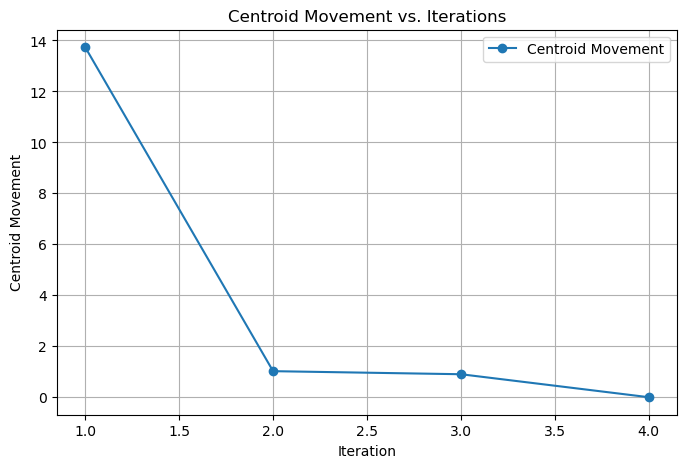

In [10]:

centroidEuclid,idxEuclid=kmc.KMeansClustering(X,3,100,False)

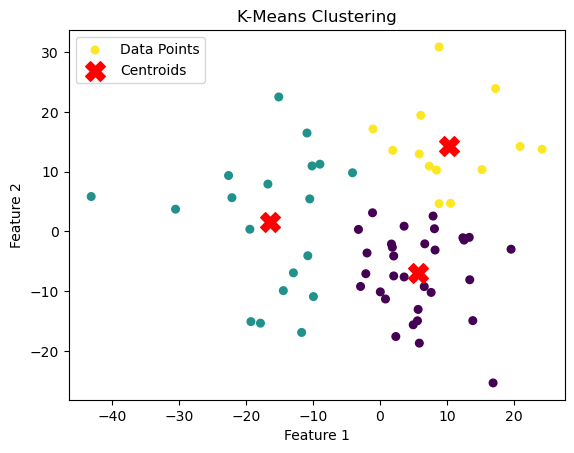

In [11]:


plt.scatter(X[:, 0], X[:, 1], c=idxEuclid, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidEuclid[:, 0], centroidEuclid[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Covariance Matrix:
[[ 1.71243385e+02 -1.06683474e-05]
 [-1.06683474e-05  1.40448547e+02]]

Mean of the data:
[-1.0354178e-05  4.4565353e-05]
Converged in 5 iterations!


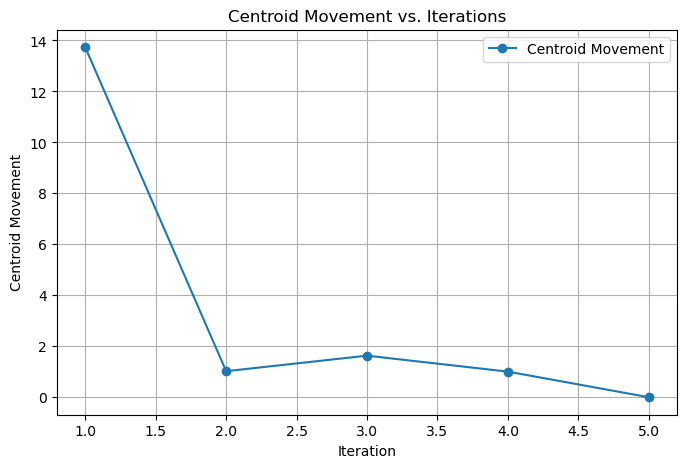

In [12]:

centroidma,idxma=kmc.KMeansClustering(X,3,100,True)

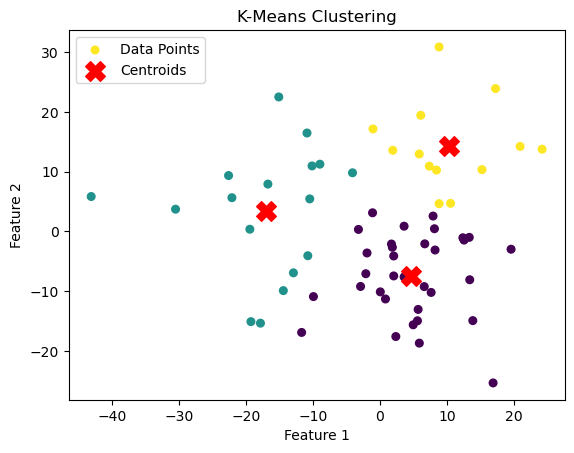

In [13]:

plt.scatter(X[:, 0], X[:, 1], c=idxma, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidma[:, 0], centroidma[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

<class 'numpy.ndarray'>


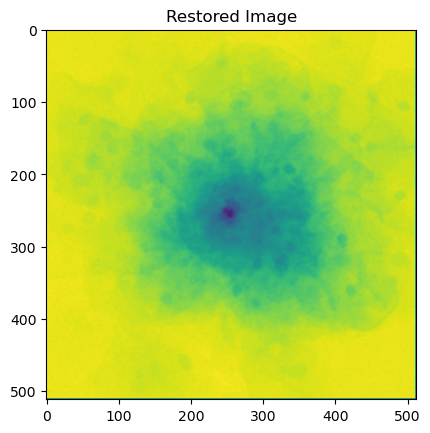

In [14]:
p=centroidEuclid[0]
tp=pca.inverse_transform(p)
print(type(tp))
restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

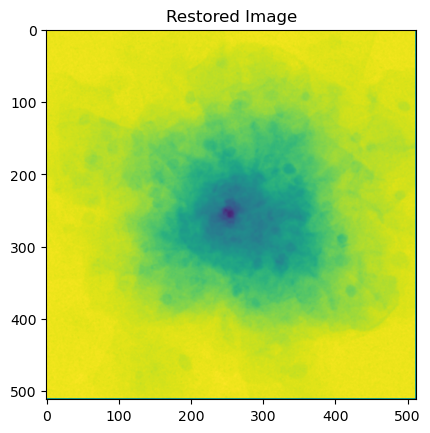

In [15]:

p=centroidma[0]
tp=pca.inverse_transform(p)
restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

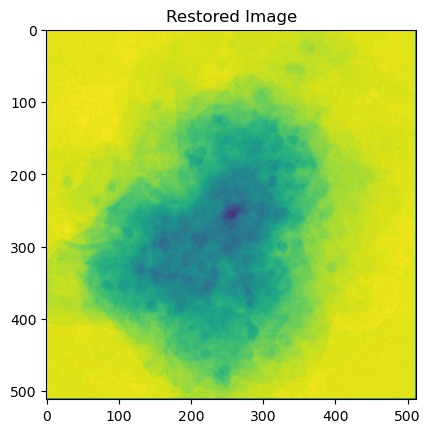

In [16]:

p=centroidEuclid[1]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

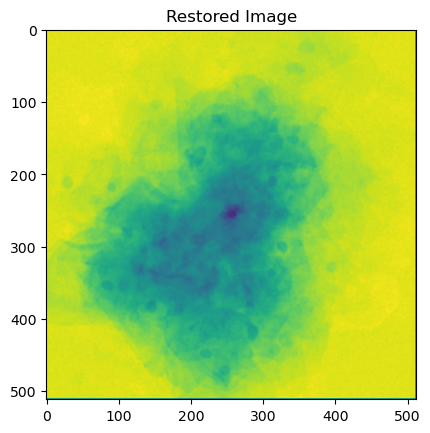

In [17]:

p=centroidma[1]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

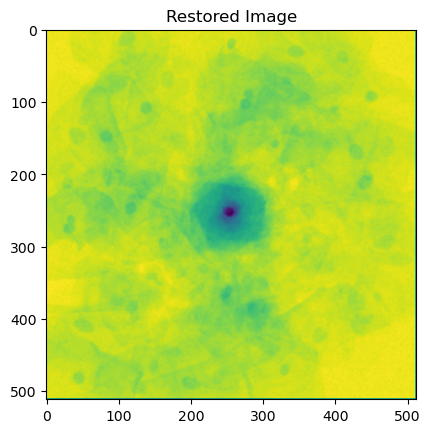

In [18]:

p=centroidEuclid[2]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

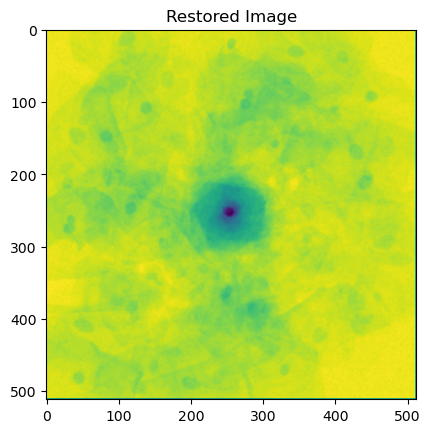

In [19]:

p=centroidma[2]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()